In [7]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 39.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 MB 33.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 54.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 9.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.0/960.0 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.2 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2
import mediapipe
import matplotlib.pyplot as plt
# https://www.pexels.com/photo/portrait-photo-of-woman-in-white-crew-neck-shirt-8090149/
img = cv2.imread("pexels-photo-8090149.jpeg")

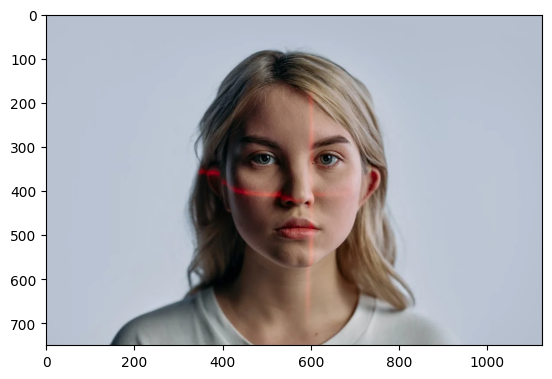

In [9]:
plt.imshow(img[:,:,::-1])

In [15]:
mp_face_detection = mediapipe.solutions.face_detection
face_detector =  mp_face_detection.FaceDetection( min_detection_confidence = 0.6)


In [16]:
results = face_detector.process(img)
results.detections

[label_id: 0
 score: 0.9129080772399902
 location_data {
   format: RELATIVE_BOUNDING_BOX
   relative_bounding_box {
     xmin: 0.34060367941856384
     ymin: 0.3241179585456848
     width: 0.31036701798439026
     height: 0.4655241370201111
   }
   relative_keypoints {
     x: 0.4401824176311493
     y: 0.44804906845092773
   }
   relative_keypoints {
     x: 0.5721319317817688
     y: 0.45831990242004395
   }
   relative_keypoints {
     x: 0.5117793083190918
     y: 0.5677116513252258
   }
   relative_keypoints {
     x: 0.5056765079498291
     y: 0.6629682779312134
   }
   relative_keypoints {
     x: 0.3536849021911621
     y: 0.486342191696167
   }
   relative_keypoints {
     x: 0.6300448775291443
     y: 0.5028083324432373
   }
 }]

In [17]:
width = img.shape[1]
height = img.shape[0]

In [18]:
face.score 

# for face in results.detections:
#     if face.score > 0.8:
#         face.location_data.relative_bounding_box

[0.8856351971626282]

In [38]:
if results.detections:
    for face in results.detections:
       
        confidence = face.score
        bounding_box = face.location_data.relative_bounding_box
         
        x = int(bounding_box.xmin * img.shape[1])
        w = int(bounding_box.width * img.shape[1])
        y = int(bounding_box.ymin * img.shape[0])
        h = int(bounding_box.height * img.shape[0])
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), thickness = 2)
        
        landmarks = face.location_data.relative_keypoints
        right_eye = (int(landmarks[0].x * img.shape[1]), int(landmarks[0].y * img.shape[0]))
        left_eye = (int(landmarks[1].x * img.shape[1]), int(landmarks[1].y * img.shape[0]))
        nose = (int(landmarks[2].x * img.shape[1]), int(landmarks[2].y * img.shape[0]))
        mouth = (int(landmarks[3].x * img.shape[1]), int(landmarks[3].y * img.shape[0]))
        right_ear = (int(landmarks[4].x * img.shape[1]), int(landmarks[4].y * img.shape[0]))
        left_ear = (int(landmarks[5].x * img.shape[1]), int(landmarks[5].y * img.shape[0]))
        cv2.circle(img, right_eye, 15, (0, 0, 255), -1)
        cv2.circle(img, left_eye, 15, (0, 0, 255), -1)
        cv2.circle(img, nose, 15, (0, 0, 255), -1)
        cv2.circle(img, mouth, 15, (0, 0, 255), -1)
        cv2.circle(img, right_ear, 15, (0, 0, 255), -1)
        cv2.circle(img, left_ear, 15, (0, 0, 255), -1)


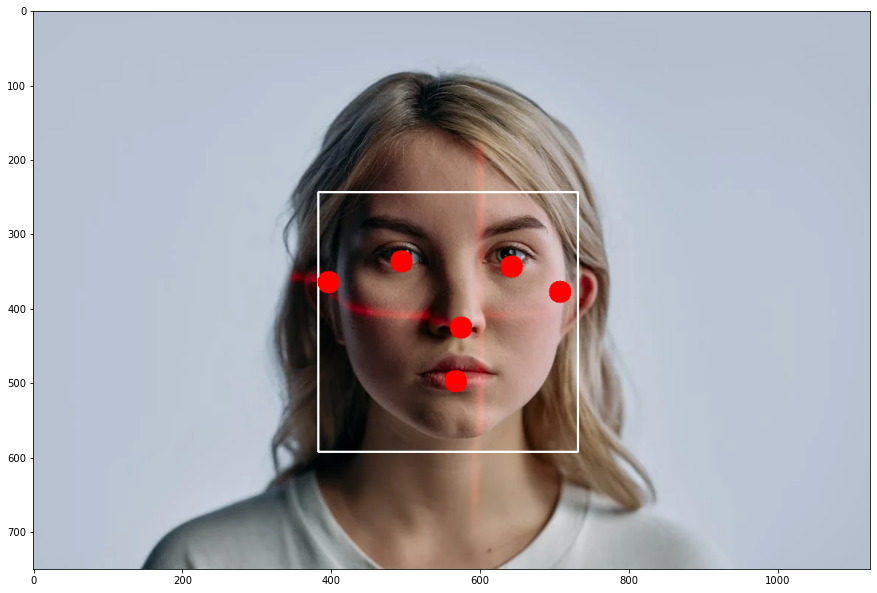

In [39]:
fig =  plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])
plt.show()

In [10]:
!pip install cvzone

  Using cached cvzone-1.5.6.tar.gz (12 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.5.6-py3-none-any.whl size=18750 sha256=c778c0afbe455feb59b2c7d0683ace87af699b577339e0555514d23cef65dff8
  Stored in directory: /Users/paperlessmac2/Library/Caches/pip/wheels/67/60/9a/e5060027d8eae2c01ba872fdbc094a6fe3fee15794ee3dc709
Successfully built cvzone


In [ ]:
#Lips

In [13]:
import cv2
from cvzone.FaceMeshModule import FaceMeshDetector
import cvzone
cap = cv2.VideoCapture(0)
cap.set(3,1280)
cap.set(4,720)

detector = FaceMeshDetector(maxFaces=1)
idList = [0,17,78,292] 

In [ ]:
while True:
    success, img = cap.read()
    img, faces = detector.findFaceMesh(img,draw = False)
    if faces:
        face = faces[0]
        # for idNo,point in enumerate(face):
        #     cv2.putText(img,str(idNo),point,cv2.FONT_HERSHEY_COMPLEX,0.7,(255,0,255),1)
        for id in idList:
            cv2.circle(img,face[id],5,(255,0,255),5)
       
        
        upDown,_ = detector.findDistance(face[idList[0]],face[idList[1]])
        leftRight,_ = detector.findDistance(face[idList[2]],face[idList[3]])
        
        ratio = int((upDown/leftRight)*100)
        if ratio > 60:
            mouthStatus = 'open'
            cv2.line(img,face[idList[0]],face[idList[1]],(0,0,255),3)
            cv2.line(img,face[idList[2]],face[idList[3]],(0,0,255),3)
        else:
            cv2.line(img,face[idList[0]],face[idList[1]],(0,255,0),3)
            cv2.line(img,face[idList[2]],face[idList[3]],(0,255,0),3)
            mouthStatus = 'close'
        cv2.putText(img,str(mouthStatus),(50,50),cv2.FONT_HERSHEY_COMPLEX,0.7,(255,0,255),1)
        cv2.putText(img,str(ratio),(50,100),cv2.FONT_HERSHEY_COMPLEX,0.8,(255,0,255),1)
        
    cv2.imshow("Image",img)
    cv2.waitKey(1)

In [ ]:
#eyes

In [ ]:
import cv2 as cv
import numpy as np
import mediapipe as mp
import math
mp_face_mesh = mp.solutions.face_mesh

# cap = cv.VideoCapture(0)
cap = cv.VideoCapture('video/source/7/IB_MAA_19042022.mp4')
#indices da iris
RIGHT_IRIS = [474, 475, 476, 477]

LEFT_IRIS = [469, 470, 471, 472]
L_H_LEFT = [33]  # right eye right most landmark
L_H_RIGHT = [133]  # right eye left most landmark
R_H_LEFT = [362]  # left eye right most landmark
R_H_RIGHT = [263]  # left eye left most landmark

#Funcao que define distancias euclidianas dos pontos nos olhos
def euclidean_distance(point1, point2):
    x1, y1 =point1.ravel()
    x2, y2 =point2.ravel()
    distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    return distance

#Funcao para encontra posicao da iris
def iris_position(iris_center, right_point, left_point):
    center_to_right_dist = euclidean_distance(iris_center, right_point)
    total_distance = euclidean_distance(right_point, left_point)
    ratio = center_to_right_dist/total_distance
    iris_position =""
    if ratio <= 0.42:
        iris_position="right"
    elif ratio > 0.42 and ratio <= 0.57:
        iris_position="center"
    else:
        iris_position = "left"
    return iris_position, ratio

with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv.flip(frame, 1)
        rgb_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)   #Mediapipe precisa do formato de cores RGB mas o OpenCV usa o BGR
        img_h, img_w = frame.shape[:2]
        results = face_mesh.process(rgb_frame)
        if results.multi_face_landmarks:
            mesh_points=np.array([np.multiply([p.x, p.y], [img_w, img_h]).astype(int) for p in results.multi_face_landmarks[0].landmark])

            #transformar formas quadradas em círculos, função do OpenCV fornece círculos delimitadores com base nos pontos fornecidos.
            #minEnclosingCircle que retorna, o centro (x,y) e o raio dos círculos, os valores de retorno são de ponto flutuante, necessario transformá-los em int.
            (l_cx, l_cy), l_radius = cv.minEnclosingCircle(mesh_points[LEFT_IRIS])
            (r_cx,r_cy), r_radius = cv.minEnclosingCircle(mesh_points[RIGHT_IRIS])

            # transforma pontos centrais em array np
            center_left = np.array([l_cx, l_cy], dtype=np.int32)
            center_right = np.array([r_cx, r_cy], dtype=np.int32)

            #desenhe o círculo com base nos valores de retorno da minEnclosingCircle, através do CIRCLE que desenha a imagem do círculo com base no centro (x, y) e no raio
            cv.circle(frame, center_left, int(l_radius), (255, 0, 255), 1, cv.LINE_AA)
            cv.circle(frame, center_right, int(r_radius), (255, 0, 255), 1, cv.LINE_AA)

            #mostrar pontos nos cantos dos olhos
            cv.circle(frame, mesh_points[R_H_RIGHT][0], 3, (255, 255, 255), -1, cv.LINE_AA)
            cv.circle(frame, mesh_points[R_H_LEFT][0], 3, (0, 255, 255), -1, cv.LINE_AA)

            iris_pos, ratio = iris_position(center_right, mesh_points[R_H_RIGHT], mesh_points[R_H_LEFT][0])
            cv.putText(frame, f"ref : {iris_pos} {ratio:.2f}",(50,50),cv.FONT_HERSHEY_COMPLEX,0.7,(255,0,255),1)
            # print(iris_pos)
        cv.imshow("img", frame)
        key = cv.waitKey(1)
        if key ==ord("q"):
            break
cap.release()
cv.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [ ]:
#hand

In [ ]:
from cvzone.HandTrackingModule import HandDetector
import cv2
from cvzone.FaceMeshModule import FaceMeshDetector
idList = 0
cap = cv2.VideoCapture(0)
detector = HandDetector(detectionCon=0.8, maxHands=2)
detector2 = FaceMeshDetector(maxFaces=1)
while True:
    # Get image frame
    success, img = cap.read()
    # Find the hand and its landmarks
    hands, img = detector.findHands(img)  # with draw hands
    img2, faces = detector2.findFaceMesh(img,draw = False) # with draw face
    # hands = detector.findHands(img, draw=False)  # without draw
    if faces:
        face = faces[0]
        cv2.circle(img,face[0],5,(255,0,255),5)
    if hands:
        # Hand 1
        hand1 = hands[0]
        lmList1 = hand1["lmList"]  # List of 21 Landmark points
        bbox1 = hand1["bbox"]  # Bounding box info x,y,w,h
        centerPoint1 = hand1['center']  # center of the hand cx,cy
        handType1 = hand1["type"]  # Handtype Left or Right
        fingers1 = detector.fingersUp(hand1)
        
        if len(hands) == 2:
            # Hand 2
            try:
                hand2 = hands[1]
                lmList2 = hand2["lmList"]  # List of 21 Landmark points
                bbox2 = hand2["bbox"]  # Bounding box info x,y,w,h
                centerPoint2 = hand2['center']  # center of the hand cx,cy
                handType2 = hand2["type"]  # Hand Type "Left" or "Right"

                fingers2 = detector.fingersUp(hand2)
                # cv2.circle(img, hands[10],5,(0,0,255),3)
                # Find Distance between two Landmarks. Could be same hand or different hands
                length, info, img = detector.findDistance(lmList1[8], lmList2[8], img)  # with draw
                # length, info = detector.findDistance(lmList1[8], lmList2[8])  # with draw
            except:
                print("An exception occurred")

    # Display
    cv2.imshow("Image", img)
    cv2.waitKey(1)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred


In [ ]:
#detect_low_contrast_video
!pip uninstall imutils

In [1]:
import cv2
import numpy as np
import face_recognition
import time


def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

# camera device can be different for your computer. Try to change 0 to 1 or other if you get some error 
video=cv2.VideoCapture(0)

count=0
l=[]
while True:
        
    ret, frame = video.read()
    frame = increase_brightness(frame, value=100)#change the brighness as per your requiremens before only more the value more the brightness
    cv2.imshow("frame",frame)
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

ModuleNotFoundError: No module named 'face_recognition'